# Проект: Исследование стартапов

## Введение

**Автор:** coatiii

**Цель:**
- помочь финансовой компании выйти на рынок стартапов, предоставив им полезную информацию из исторических данных, после исследовательского анализа.

**Задачи:**
1. Загрузка данных и знакомство с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
    - изучить данные более детально
    - изучить взаимосвязь данных
4. Сформулировать выводы по проведённому анализу.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* people.csv
* education.csv
* degrees.csv

Опциональные датасеты:
* fund.csv
* investment.csv


Они находятся в папке datasets, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### 1.1. Вывод общей информации, исправление названия столбцов

- Загрузите все данные по проекту.
- Проверьте названия столбцов.
- Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

Нам предоставлены следующие датасеты, информацию в них предстоит проверить и откорректировать:
* acquisition.csv - содержит информацию о компаниях и раундах финансирования:
  - id — идентификатор покупки.
  - acquiring_company_id — идентификатор покупающей компании.
  - acquired_company_id — идентификатор покупаемой компании.
  - term_code — варианты расчёта.
  - price_amount — сумма сделки.
  - acquired_at — дата сделки. 
* company_and_rounds.csv - содержит информацию о компаниях и раундах финансирования:
  - company ID — идентификатор компании.
  - name — название компании.
  - category code — категория области деятельности компании.
  - status — статус компании.
  - founded at — дата инвестирования.
  - closed at — дата закрытия компании.
  - domain — официальный сайт компании.
  - network username — ник компании в сети.
  - country code — код страны компании.
  - investment rounds — число инвестиционных раундов.
  - funding rounds — число раундов финансирования.
  - funding total — сумма финансирования.
  - milestones — вехи финансирования.
  - funding round id — идентификатор этапа финансирования.
  - company id — идентификатор компании.
  - funded at — дата финансирования.
  - funding round type — тип финансирования.
  - raised amount — сумма финансирования.
  - pre money valuation — предварительная денежная оценка.
  - participants — число участников.
  - s first round — является ли раунд первым.
  - is last round — является раунд последним.
* people.csv - Содержит информацию о сотрудниках:
  - id — идентификатор сотрудника.
  - first_name — имя сотрудника.
  - last_name — фамилия сотрудника.
  - company_id — идентификатор компании.
  - network_username — ник в социальных сетях.
* education.csv - содержит информацию об образовании сотрудника:
  - id — идентификатор записи об образовании.
  - person_id — идентификатор работника.
  - instituition — название учебного заведения.
  - graduated_at — дата получения образования
* degrees.csv - Содержит информацию о типе образования сотрудника:
  - id — идентификатор записи.
  - object_id — идентификатор сотрудника.
  - degree_type — тип образования.
  - subject — специальность.

In [1]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
!pip install phik

In [2]:
#Выгружаем данные в переменные:
acquis_df = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
с_and_r_df = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
people_df = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
educat_df = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
degrees_df = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')

In [3]:
#Проверим названия столбцов в каждом датафрейме:
acquis_df.columns

Index(['id', 'acquiring_company_id', 'acquired_company_id', 'term_code',
       'price_amount', 'acquired_at'],
      dtype='object')

In [4]:
с_and_r_df.columns

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

Тут потребуется коррекция до змеинного вида.

In [5]:
people_df.columns

Index(['id', 'first_name', 'last_name', 'company_id', 'network_username'], dtype='object')

In [6]:
educat_df.columns

Index(['id', 'person_id', 'instituition', 'graduated_at'], dtype='object')

In [7]:
degrees_df.columns

Index(['id', 'object_id', 'degree_type', 'subject'], dtype='object')

Названия столбцов корректны, за исключением названий в датафрейме с_and_r_df.

In [8]:
#Поменяем названия столбцов в с_and_r_df, чтобы они имели змеинный вид:
def no_space(df):
    for col in df.columns:
        if '  ' in col:
            new_col_name = col.replace('  ', ' ')
            df = df.rename(columns={col: new_col_name})
    return df

с_and_r_df = no_space(с_and_r_df)

In [9]:
с_and_r_df.columns

Index(['company ID', 'name', 'category code', 'status', 'founded at',
       'closed at', 'domain', 'network username', 'country code',
       'investment rounds', 'funding rounds', 'funding total', 'milestones',
       'funding round id', 'company id', 'funded at', 'funding round type',
       'raised amount', 'pre money valuation', 'participants',
       'is first round', 'is last round'],
      dtype='object')

In [10]:
def be_snake (df):
    for col in df.columns:
        if ' ' in col:
            new_col_name = col.replace(' ', '_')
            df = df.rename(columns={col: new_col_name})
    return df


с_and_r_df = be_snake(с_and_r_df)

In [11]:
с_and_r_df.columns

Index(['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

Теперь названия столбцов корректны.

In [12]:
#Используем метода head() и info() для обзора каждого датафрейма:
acquis_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [13]:
acquis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


- Строк 9407, столбцов 6

По типам данных:
- Можно понизить разрядность с int64 до int8 у ряда столбцов: 'id', 'acquiring_company_id', 'acquired_company_id', 'price_amount'
- Для 'term_code' можно поменять тип данных на category (рассмотреть варинт расчета как категориальное значение)
- Для 'acquired_at' посенять тип данных на datetime

Пропуски есть: 'term_code', 'acquired_at'.

In [14]:
с_and_r_df.head()

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
с_and_r_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_ID           217472 non-null  float64
 1   name                 217472 non-null  object 
 2   category_code        143886 non-null  object 
 3   status               217472 non-null  object 
 4   founded_at           109956 non-null  object 
 5   closed_at            3449 non-null    object 
 6   domain               147159 non-null  object 
 7   network_username     95534 non-null   object 
 8   country_code         108607 non-null  object 
 9   investment_rounds    217472 non-null  float64
 10  funding_rounds       217472 non-null  float64
 11  funding_total        217472 non-null  float64
 12  milestones           217472 non-null  float64
 13  funding_round_id     52928 non-null   float64
 14  company_id           52928 non-null   float64
 15  funded_at        

- Столбец 'company__ID',  funding__round__id, company__id : данные не соответствуют столбцу, представлены просто числа формата float, для такого столбца лучше тип object
- 'category__code' - лучше поменять тип данных на category
- 'status' - тоже лучше поменять на category или на bool, если значения там двоичного характера
- founded__at и closed__at, funded__at: нужен тип datetime
- investment__rounds, funding rounds, participants: integer
- funding__round__type в целом object подходит, можно поменять на category
- is__first__round, is__last__round  - подойдет булевой тип данных

In [16]:
people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [17]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


226 709 строк, 5 столбцов.

- id выглядит странно: целочисленные значения, будто 10 в степении 1, 2 итд
- company_id тоже странного вида: идентификационное значение в виде числа с плавающей точкой, для любых id лучше всего подходит тип object
- пропуски есть в: first_name, last_name, company_id

In [18]:
educat_df.head() 

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [19]:
educat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


109 610 строк, 4 столбца

- graduated_at - нужен тип datetime
- пропуски есть в: instituition, graduated_at

In [20]:
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [21]:
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


109 610 строк, 4 столбца.

- пропуски есть в: degree_type, subject

Теперь подробнее рассмотрим пропуски в каждом датафрейме:
acquis_df 
с_and_r_df 
people_df  
educat_df 
degrees_df

In [22]:
acquis_df.isna().sum() 

id                         0
acquiring_company_id       0
acquired_company_id        0
term_code               7576
price_amount               0
acquired_at               29
dtype: int64

In [23]:
acquis_df.isna().mean()

id                      0.000000
acquiring_company_id    0.000000
acquired_company_id     0.000000
term_code               0.805358
price_amount            0.000000
acquired_at             0.003083
dtype: float64

- Прпопуски в term_code: 7576 (80.5%)
- В  acquired_at: 29 пропусков (0.3%)           

In [24]:
result = с_and_r_df.isna().sum().reset_index(name='missing_values')
result.sort_values(by='missing_values', ascending=False)

,index,missing_values
5,closed_at,214325
15,funded_at,165094
21,is_last_round,164846
20,is_first_round,164846
19,participants,164846
18,pre_money_valuation,164846
17,raised_amount,164846
16,funding_round_type,164846
13,funding_round_id,164846
14,company_id,164846


In [25]:
result = (с_and_r_df.isna().mean()).reset_index(name='missing_values')
result.sort_values(by='missing_values', ascending=False)

,index,missing_values
5,closed_at,0.984162
15,funded_at,0.758098
21,is_last_round,0.756959
20,is_first_round,0.756959
19,participants,0.756959
18,pre_money_valuation,0.756959
17,raised_amount,0.756959
16,funding_round_type,0.756959
13,funding_round_id,0.756959
14,company_id,0.756959


- closed__at: 214 325 пропусков (98.4%) - большинство компаний просто еще не закрылось.
- funded__at: 165 094 (75.8%) - лишь 34.2% профинансированы

- is__last__round, is__first__round, participants, pre__money__valuation, pre__money__valuation, raised__amount, funding__round__type, funding__round__id, company__id: 164 846 (75.7%)

- network__username: 122 240 (56.13%)
- country__code: 109 167 (50.12%)
- founded__at: 107 818 (49.5%)
- category__code: 73 888 (34%)
- domain 70 615 (32.42%)
- company__ID, milestones, name, funding__rounds, investment__rounds, status, funding__total: 302 (0.14%)

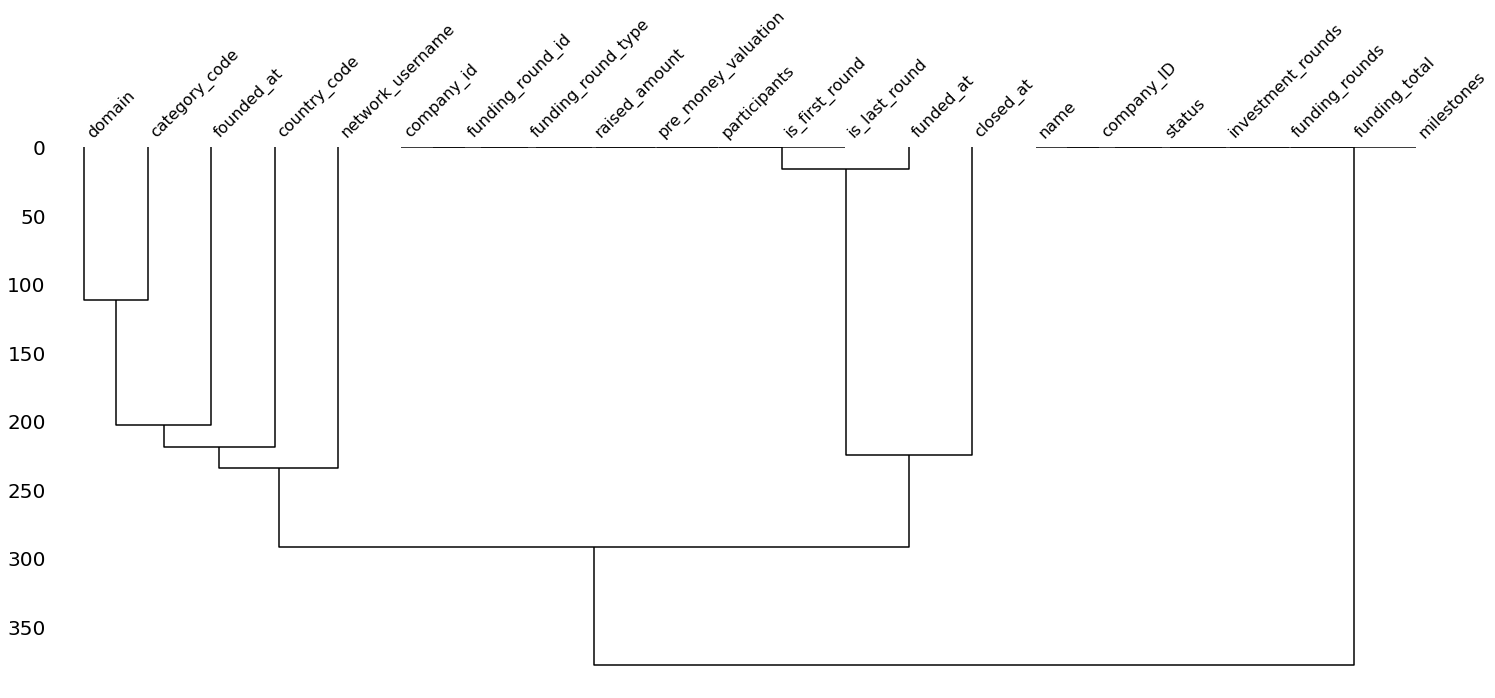

In [26]:
# Код ревьюера
# Метод dendrogram из библиотеки missingno
!pip install missingno -q
import missingno as msno
msno.dendrogram(с_and_r_df)
plt.show()

In [27]:
result = people_df.isna().sum().reset_index(name='missing_values')
result.sort_values(by='missing_values', ascending=False)

,index,missing_values
3,company_id,192094
4,network_username,187842
1,first_name,5
2,last_name,1
0,id,0


In [28]:
result = (people_df.isna().mean()).reset_index(name='missing_values')
result.sort_values(by='missing_values', ascending=False)

,index,missing_values
3,company_id,0.847315
4,network_username,0.828560
1,first_name,0.000022
2,last_name,0.000004
0,id,0.000000


- company_id: 192 094 (84.7%)
- network_username: 187 842 (82.8%)
- first_name: 5
- last_name: 1 


In [29]:
educat_df.isna().sum() 

id                  0
person_id           0
instituition       55
graduated_at    51556
dtype: int64

In [30]:
educat_df.isna().mean()  

id              0.000000
person_id       0.000000
instituition    0.000502
graduated_at    0.470359
dtype: float64

- graduated_at: 51 556 (47%)
- instituition: 55 (0.05%)

In [31]:
degrees_df.isna().sum()

id                 0
object_id          0
degree_type    11218
subject        28312
dtype: int64

In [32]:
degrees_df.isna().mean()

id             0.000000
object_id      0.000000
degree_type    0.102345
subject        0.258298
dtype: float64

- subject: (25.8%)
- degree_type: (10.2%)




### 1.2. Смена типов и анализ пропусков

- Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.
- Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

Изменим типы данных на корректные, понизим разрядность:

In [33]:
for column in ['founded_at', 'closed_at', 'funded_at']:
    с_and_r_df[column] = pd.to_datetime(с_and_r_df[column], format='%Y/%m/%d')
    
acquis_df['acquired_at'] = pd.to_datetime(acquis_df['acquired_at'], format='%Y/%m/%d')
educat_df['graduated_at'] = pd.to_datetime(educat_df['graduated_at'], format='%Y/%m/%d')

In [34]:
#Провнрим измененные типы данных:
с_and_r_df.dtypes  

company_ID                    float64
name                           object
category_code                  object
status                         object
founded_at             datetime64[ns]
closed_at              datetime64[ns]
domain                         object
network_username               object
country_code                   object
investment_rounds             float64
funding_rounds                float64
funding_total                 float64
milestones                    float64
funding_round_id              float64
company_id                    float64
funded_at              datetime64[ns]
funding_round_type             object
raised_amount                 float64
pre_money_valuation           float64
participants                  float64
is_first_round                float64
is_last_round                 float64
dtype: object

In [35]:
acquis_df.dtypes  

id                               int64
acquiring_company_id             int64
acquired_company_id              int64
term_code                       object
price_amount                     int64
acquired_at             datetime64[ns]
dtype: object

In [36]:
educat_df.dtypes

id                       int64
person_id                int64
instituition            object
graduated_at    datetime64[ns]
dtype: object

In [37]:
people_df.dtypes

id                    int64
first_name           object
last_name            object
company_id          float64
network_username     object
dtype: object

In [38]:
degrees_df.dtypes

id              int64
object_id      object
degree_type    object
subject        object
dtype: object

В с_and_r_df очень много пропусков, в остальных df они тоже есть, но не в таком большом количестве.

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

- Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [39]:
с_and_r_df.columns

Index(['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

In [40]:
#Выводим год из даты:
с_and_r_df = с_and_r_df[с_and_r_df['founded_at'].notnull()]

с_and_r_df['years'] = с_and_r_df['founded_at'].dt.year.astype(int)
#Размер средств на 1 раунд:
с_and_r_df['finance_per_round'] = с_and_r_df['raised_amount']/с_and_r_df['funding_rounds']

In [41]:
#Посмотрим для справки минимальный и максимальный года в столбце 'years':
с_and_r_df['years'].min()


1901

In [42]:
с_and_r_df['years'].max()

2014

In [43]:
#Проверим наличие столбца 'years'
print(с_and_r_df.columns)

Index(['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round', 'years', 'finance_per_round'],
      dtype='object')


In [44]:
summary = с_and_r_df.groupby('years').agg(
    median_finance_per_round=('finance_per_round', 'median'),
    total_rounds=('funding_rounds', 'sum')
)

summary_filtered = summary[summary['total_rounds'] > 50].sort_values(by='years', ascending=True).reset_index()
summary_filtered['years'] = summary_filtered['years'].astype(int)

print(summary_filtered)


    years  median_finance_per_round  total_rounds
0    1978              2.333333e+06          71.0
1    1979              2.916667e+06          60.0
2    1980              3.000000e+06          64.0
3    1983              2.702000e+06          95.0
4    1984              2.500000e+06          71.0
5    1985              1.664583e+06         266.0
6    1986              3.379990e+06         104.0
7    1987              2.141120e+06         158.0
8    1988              1.439582e+06          80.0
9    1989              4.625000e+06         174.0
10   1990              3.593500e+06         105.0
11   1991              2.613492e+06         170.0
12   1992              2.623840e+06         145.0
13   1993              3.000000e+06         219.0
14   1994              3.750000e+06         349.0
15   1995              3.000000e+06         560.0
16   1996              1.838889e+06        1078.0
17   1997              2.658333e+06        1184.0
18   1998              2.236364e+06        1964.0


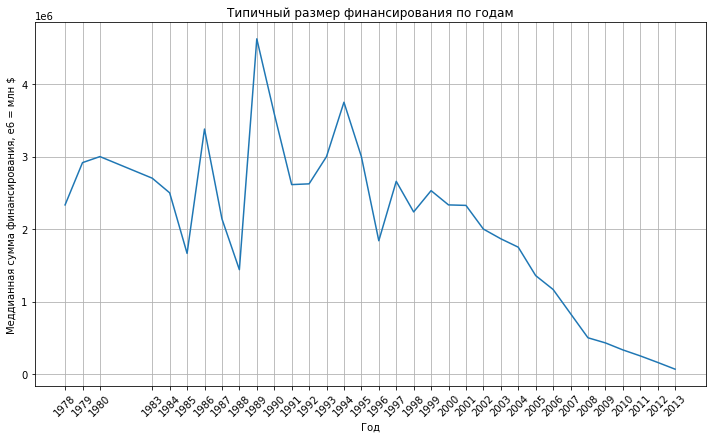

In [45]:
plt.figure(figsize=(10, 6))
sns.lineplot(data= summary_filtered, x='years', y='median_finance_per_round')
plt.title('Типичный размер финансирования по годам')
plt.xlabel('Год')
plt.ylabel('Меддианная сумма финансирования, е6 = млн $')
plt.grid(True)
plt.tight_layout()

plt.xticks(ticks=summary_filtered['years'].unique(), rotation=45)

plt.show()

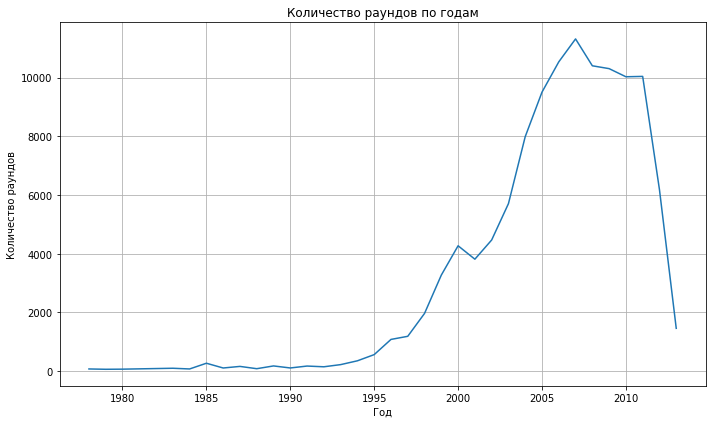

In [46]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=summary_filtered, x='years', y='total_rounds')
plt.title('Количество раундов по годам')
plt.xlabel('Год')
plt.ylabel('Количество раундов')
plt.grid(True)
plt.tight_layout()
plt.show()

В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Судя по графику примерно в 1989 году
Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?
- Количество раундов возрастает примерно но 2007 года, затем убывает; по количеству выделяемых средств - убывание


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.
- Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [47]:
educat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


In [48]:
educat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


In [49]:
#Проверим полные дупликаты в educat_df:
educat_df.duplicated().sum()

0

In [50]:
# Проверяем неявные дубликаты в датафрейме по стобцу 'id':
educat_df.duplicated(subset='id').sum()

0

In [51]:
#Удалим полные дубликаты: 
educat_df.drop_duplicates()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaT
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaT
...,...,...,...,...
109605,109606,268589,American Institute of Certtified Public Accoun...,NaT
109606,109607,268527,South China University of Technology,NaT
109607,109608,268527,Clarkson University,NaT
109608,109609,268528,Colorado State University,NaT


In [52]:
#Проверяем избавились ли мы от дубликатов:
educat_df.duplicated().sum()

0

In [53]:
#Проверим полные дупликаты в people_df:
people_df.duplicated().sum()

0

In [54]:
# Проверяем неявные дубликаты в датафрейме по стобцу 'id':
people_df.duplicated(subset='id').sum()

1

In [55]:

#Удалим полные дубликаты: 
people_df.drop_duplicates(subset='id')

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN
...,...,...,...,...,...
226704,99999,Ramon,Peypoch,NaN,NaN
226705,174088,Dr. Ray,Woods,188200.0,network
226706,118386,Ricardo,Durand,143419.0,itechsocialnet
226707,175827,mahesh,kumar,NaN,socialnethubs


In [56]:
# Проверяем избавились ли мы от дубликатов:
people_df.duplicated(subset='id').sum()

1

In [57]:
employ_df = people_df.merge(educat_df, left_on = 'id', right_on = 'person_id', how = 'left')
display(employ_df)

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...
267689,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaN,NaT
267690,174088,Dr. Ray,Woods,188200.0,network,25958.0,174088.0,Sydney University Medical School,1982-01-01
267691,118386,Ricardo,Durand,143419.0,itechsocialnet,18871.0,118386.0,ESCS,2004-01-01
267692,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaN,NaT


In [58]:
employ_df[employ_df['instituition'].isna()]


,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT
5,100002,Keith,Kurzendoerfer,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...
267684,99996,Rick,Tamberrino,NaN,tamberrino,NaN,NaN,NaN,NaT
267688,99998,Adam,Neumann,NaN,NaN,NaN,NaN,NaN,NaT
267689,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaN,NaT
267692,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaN,NaT


In [59]:
#Нужно посчитать сколько в каждой компании сотрудников:
company_sizes = employ_df.groupby('company_id')['person_id'].count().reset_index()
company_sizes = company_sizes.rename(columns={'person_id': 'count'})
company_sizes = company_sizes.sort_values(by='count', ascending=True)
display(company_sizes)

,company_id,count
11460,70873.0,0
9981,59987.0,0
19180,195378.0,0
19178,195353.0,0
9988,60023.0,0
...,...,...
1761,4175.0,82
20605,231067.0,97
777,1242.0,155
25,29.0,181


In [60]:
company_sizes_sort = company_sizes['count'].value_counts().sort_index()
print(company_sizes_sort)

0      9503
1      6650
2      3958
3      1406
4       590
5       297
6       157
7       105
8        69
9        39
10       25
11       13
12       17
13       14
14        9
15        7
16        4
17       13
18        3
19        4
20        4
22        5
24        3
25        1
26        1
28        1
29        2
30        1
31        1
33        1
38        2
39        2
40        1
42        1
44        1
48        1
50        1
54        1
60        1
64        1
68        1
72        1
82        1
97        1
155       1
181       1
300       1
Name: count, dtype: int64


In [61]:
#Разделим компании на категории, опираясь на классификацию компаний по кол-ву сотрудников в ней:
employ_df['company_sizes_categ'] = pd.cut(company_sizes['count'],
                                      bins=[0, 9, 97, 300],
                                      labels=["Микрокомпания", "Малая компания", "Средняя компания"])
display(employ_df['company_sizes_categ'])

0          Микрокомпания
1          Микрокомпания
2          Микрокомпания
3         Малая компания
4         Малая компания
               ...      
267689               NaN
267690               NaN
267691               NaN
267692               NaN
267693               NaN
Name: company_sizes_categ, Length: 267694, dtype: category
Categories (3, object): ['Микрокомпания' < 'Малая компания' < 'Средняя компания']

Посчитаем сколько всего строк в датафрейме пусты по содержанию в столбцах instituition и graduated_at (отсутствие инф. в этих столбцах будем считать как отсутствие инф. об образовании сотрудника.)


In [62]:
employ_df['has_no_education'] = employ_df['instituition'].isna() & employ_df['graduated_at'].isna()
employ_df['has_no_education'].sum()

158657

Если считать за отсутствие информации по образованию - отсутствие информации в столбцах instituition и graduated_at одновременно, то получается - 158 656 строк.

In [63]:
#Теперь нужно посчитать долю отсутствия информации об образовании в разрезе каждой категории:
summary = employ_df.groupby('company_sizes_categ')['has_no_education'].mean().reset_index()
summary.columns = ['Размер компании', 'Доля без образования']
display(summary)

,Размер компании,Доля без образования
0,Микрокомпания,0.666415
1,Малая компания,0.648276
2,Средняя компания,0.333333


Из полученных выше данных можем сделать вывод: чем больше компания по количеству людей в ней - тем больше в ней людей с законченным образованием. В малых компаниях могут работать студенты.

Врят ли есть смысл добавлять датафрейм degrees - он скорее как дополнение к основному датафрейму education.

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

Посмотрим еще раз на все датафреймы, где встречается network_username:

In [64]:
с_and_r_df.head()

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,years,finance_per_round
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005,1.750000e+06
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2005,3.166667e+06
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2005,8.333333e+06
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2008,NaN
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2008,NaN


In [65]:
people_df.head(20)

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN
5,100002,Keith,Kurzendoerfer,NaN,NaN
6,100006,Courtney,Homer,81558.0,jobsbostontech
7,100009,Eddy,Badrina,NaN,NaN
8,100010,Michael,Dadashyan,NaN,fbroulette
9,100011,Jeff,Grell,NaN,NaN


In [66]:
unique_df1 = set(с_and_r_df['network_username'].unique())
unique_df2 = set(people_df['network_username'].unique())

intersection = unique_df1 & unique_df2

share1 = round(len(intersection)/len(unique_df1),3)
share2 = round(len(intersection)/len(unique_df2),3)
display(share1, share2)


0.03

0.049

Доли пересекающихся значений очень малы, нельзя сказать, что столбец network_username подходит для объединения данных.

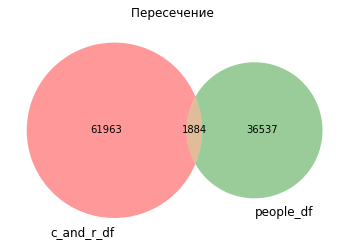

In [67]:
# Код ревьюера
!pip install matplotlib-venn -q
from matplotlib_venn import venn2
first_id = set(с_and_r_df['network_username'].dropna().unique())
second_id = set(people_df['network_username'].dropna().unique())
# Строим диаграмму Венна
venn2([first_id, second_id], set_labels=('с_and_r_df', 'people_df'))

# Отображаем график
plt.title("Пересечение ")
plt.show()


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом приведите данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

In [68]:
с_and_r_df.head(15)

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,years,finance_per_round
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005,1.750000e+06
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2005,3.166667e+06
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2005,8.333333e+06
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2008,NaN
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2008,NaN
7,10002.0,Synergie Media,advertising,operating,2007-06-27,NaT,synergie-media.com,NaN,MAR,0.0,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2007,NaN
8,10003.0,Green Basti Ecosystems,cleantech,operating,2008-08-20,NaT,NaN,NaN,IND,0.0,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2008,NaN
11,100062.0,Vetter Idea Management System,enterprise,operating,2011-08-01,NaT,getvetter.com,getvetter,NaN,0.0,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2011,NaN
12,100068.0,ChatRandom,games_video,operating,2011-02-01,NaT,chatrandom.com,chatrandom,NaN,0.0,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2011,NaN
13,10008.0,ScapadasAmorosas,other,operating,2007-03-01,NaT,scapadasamorosas.com,NaN,NaN,0.0,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2007,NaN


- По порядку стобцов начиная слева направо: логичнее было бы расположить в левой части все связанное с компанией, а далее - все что связано с финансированием и инвестициями.

- По сортировке: было бы лучше передвинуть все компании которые еще открыты в начало, и только потом - закрытые.

- Хорошо было бы сделать группировку сначала по названию компании, затем по category_code и затем отсортировать по founded_at, + учитывая все, что указано выше.



Копируем сводку о пропусках для удобства:

- closed_at: 214 325 пропусков (98.4%) - большинство компаний просто еще не закрылось.
- funded_at: 165 094 (75.8%) - лишь 34.2% профинансированы


- is_last_round, is_first_round, participants, pre_money_valuation, raised_amount, funding_round_type, funding_round_id, company_id: 164 846 (75.7%)


- network_username: 122 240 (56.13%)
- country_code: 109 167 (50.12%)
- founde_at: 107 818 (49.5%)
- category_code: 73 888 (34%)
- domain 70 615 (32.42%)


- company_ID, milestones, name, funding_rounds, investment_rounds, status, funding_total: 302 (0.14%)

In [69]:
df1 = с_and_r_df[['company_ID', 'name', 'domain', 'network_username', 'category_code', 'status', 'founded_at', 'closed_at']]

funding_cols = [ 
    'company_id', 'investment_rounds', 'funding_rounds', 'funding_round_id', 
    'funded_at', 'funding_round_type', 'raised_amount', 'funding_total', 
    'milestones', 'pre_money_valuation', 'participants', 
    'is_first_round', 'is_last_round']

df2 = с_and_r_df[funding_cols]
df2 = df2[df2.notna().any(axis=1)]


df1 = df1.drop_duplicates(subset = 'name')
df2 = df2.drop_duplicates(subset = 'funding_round_id')

display(df1)
display(df2)


,company_ID,name,domain,network_username,category_code,status,founded_at,closed_at
0,1.0,Wetpaint,wetpaint-inc.com,BachelrWetpaint,web,operating,2005-10-17,NaT
5,10000.0,MYWEBBO,mywebbo.com,NaN,network_hosting,operating,2008-07-26,NaT
6,10001.0,THE Movie Streamer,themoviestreamer.com,NaN,games_video,operating,2008-07-26,NaT
7,10002.0,Synergie Media,synergie-media.com,NaN,advertising,operating,2007-06-27,NaT
8,10003.0,Green Basti Ecosystems,NaN,NaN,cleantech,operating,2008-08-20,NaT
...,...,...,...,...,...,...,...,...
217460,150413.0,Infuy,infuy.com,network,software,operating,2007-01-01,NaT
217463,3429.0,Zend Technologies,zend.com,networkzend,software,operating,1999-01-01,NaT
217467,7748.0,Flowgram,flowgram.com,network,web,closed,2007-06-01,2008-06-11
217468,174536.0,Pphotonet,pPhotonet.co,pPhotonet,games_video,operating,2012-05-01,NaT


,company_id,investment_rounds,funding_rounds,funding_round_id,funded_at,funding_round_type,raised_amount,funding_total,milestones,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,0.0,3.0,888.0,2005-10-01,series-a,5250000.0,39750000.0,5.0,0.0,2.0,0.0,1.0
1,1.0,0.0,3.0,889.0,2007-01-01,series-b,9500000.0,39750000.0,5.0,0.0,3.0,0.0,0.0
2,1.0,0.0,3.0,2312.0,2008-05-19,series-c+,25000000.0,39750000.0,5.0,0.0,4.0,1.0,0.0
5,NaN,0.0,0.0,NaN,NaT,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
15,1001.0,0.0,1.0,1644.0,2008-02-26,series-a,5000000.0,5000000.0,3.0,0.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217466,3429.0,0.0,4.0,20896.0,2011-01-10,venture,7000000.0,44000000.0,6.0,0.0,1.0,1.0,0.0
217467,7748.0,0.0,1.0,2836.0,2008-01-31,angel,1300000.0,1300000.0,3.0,0.0,8.0,1.0,1.0
217469,43233.0,0.0,3.0,12687.0,2010-03-05,angel,500000.0,57500000.0,3.0,0.0,2.0,0.0,1.0
217470,43233.0,0.0,3.0,21259.0,2011-02-02,series-a,7000000.0,57500000.0,3.0,0.0,5.0,0.0,0.0


In [70]:
df1.duplicated().sum()

0

In [71]:
df2.duplicated().sum()

0


## Шаг 3. Исследовательский анализ объединённых таблиц

> Приступите к шагу 3 после проверки ревьюера.

<big>Студентам нужно чётко сказать - проверять дальше или не проверять.</big>


### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверьте полноту и корректность получившейся таблицы. Далее работайте только с этими данными.

In [72]:
#Объединим снова датафреймы:
new_с_and_r_df = df1.merge(df2, left_on = 'company_ID', right_on = 'company_id', how = 'right')
display(new_с_and_r_df)

,company_ID,name,domain,network_username,category_code,status,founded_at,closed_at,company_id,investment_rounds,...,funding_round_id,funded_at,funding_round_type,raised_amount,funding_total,milestones,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,wetpaint-inc.com,BachelrWetpaint,web,operating,2005-10-17,NaT,1.0,0.0,...,888.0,2005-10-01,series-a,5250000.0,39750000.0,5.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,wetpaint-inc.com,BachelrWetpaint,web,operating,2005-10-17,NaT,1.0,0.0,...,889.0,2007-01-01,series-b,9500000.0,39750000.0,5.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,wetpaint-inc.com,BachelrWetpaint,web,operating,2005-10-17,NaT,1.0,0.0,...,2312.0,2008-05-19,series-c+,25000000.0,39750000.0,5.0,0.0,4.0,1.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,0.0,...,NaN,NaT,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1001.0,FriendFeed,friendfeed.com,friendfeed,web,acquired,2007-10-01,NaT,1001.0,0.0,...,1644.0,2008-02-26,series-a,5000000.0,5000000.0,3.0,0.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43192,3429.0,Zend Technologies,zend.com,networkzend,software,operating,1999-01-01,NaT,3429.0,0.0,...,20896.0,2011-01-10,venture,7000000.0,44000000.0,6.0,0.0,1.0,1.0,0.0
43193,7748.0,Flowgram,flowgram.com,network,web,closed,2007-06-01,2008-06-11,7748.0,0.0,...,2836.0,2008-01-31,angel,1300000.0,1300000.0,3.0,0.0,8.0,1.0,1.0
43194,43233.0,Photonet,Photonet.com,Photonet,photo_video,acquired,2010-03-01,NaT,43233.0,0.0,...,12687.0,2010-03-05,angel,500000.0,57500000.0,3.0,0.0,2.0,0.0,1.0
43195,43233.0,Photonet,Photonet.com,Photonet,photo_video,acquired,2010-03-01,NaT,43233.0,0.0,...,21259.0,2011-02-02,series-a,7000000.0,57500000.0,3.0,0.0,5.0,0.0,0.0


In [73]:
new_с_and_r_df_filtr = new_с_and_r_df[
    (new_с_and_r_df['funding_rounds'] > 0)|
    (new_с_and_r_df['investment_rounds'] > 0)|
    (new_с_and_r_df['status'] == 'acquired')
]
display(new_с_and_r_df_filtr)

,company_ID,name,domain,network_username,category_code,status,founded_at,closed_at,company_id,investment_rounds,...,funding_round_id,funded_at,funding_round_type,raised_amount,funding_total,milestones,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,wetpaint-inc.com,BachelrWetpaint,web,operating,2005-10-17,NaT,1.0,0.0,...,888.0,2005-10-01,series-a,5250000.0,39750000.0,5.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,wetpaint-inc.com,BachelrWetpaint,web,operating,2005-10-17,NaT,1.0,0.0,...,889.0,2007-01-01,series-b,9500000.0,39750000.0,5.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,wetpaint-inc.com,BachelrWetpaint,web,operating,2005-10-17,NaT,1.0,0.0,...,2312.0,2008-05-19,series-c+,25000000.0,39750000.0,5.0,0.0,4.0,1.0,0.0
4,1001.0,FriendFeed,friendfeed.com,friendfeed,web,acquired,2007-10-01,NaT,1001.0,0.0,...,1644.0,2008-02-26,series-a,5000000.0,5000000.0,3.0,0.0,3.0,1.0,1.0
5,10014.0,Mobclix,mobclix.com,mobclix,mobile,acquired,2008-03-01,NaT,10014.0,0.0,...,6682.0,2008-09-01,angel,0.0,0.0,4.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43192,3429.0,Zend Technologies,zend.com,networkzend,software,operating,1999-01-01,NaT,3429.0,0.0,...,20896.0,2011-01-10,venture,7000000.0,44000000.0,6.0,0.0,1.0,1.0,0.0
43193,7748.0,Flowgram,flowgram.com,network,web,closed,2007-06-01,2008-06-11,7748.0,0.0,...,2836.0,2008-01-31,angel,1300000.0,1300000.0,3.0,0.0,8.0,1.0,1.0
43194,43233.0,Photonet,Photonet.com,Photonet,photo_video,acquired,2010-03-01,NaT,43233.0,0.0,...,12687.0,2010-03-05,angel,500000.0,57500000.0,3.0,0.0,2.0,0.0,1.0
43195,43233.0,Photonet,Photonet.com,Photonet,photo_video,acquired,2010-03-01,NaT,43233.0,0.0,...,21259.0,2011-02-02,series-a,7000000.0,57500000.0,3.0,0.0,5.0,0.0,0.0



### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [74]:
new_с_and_r_df_filtr['funding_total'].describe()

count    4.319600e+04
mean     2.674832e+07
std      1.013341e+08
min      0.000000e+00
25%      6.600000e+05
50%      5.000000e+06
75%      2.307720e+07
max      5.700000e+09
Name: funding_total, dtype: float64

(е6 = млн $)
Среднее = 2.67 млн $,
Медиана = 5.0 млн $ - значит есть выбросы. 

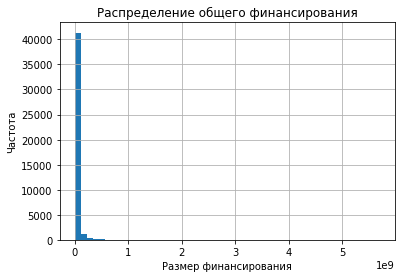

In [75]:
plt.hist(new_с_and_r_df_filtr['funding_total'], bins=50)
plt.title('Распределение общего финансирования')
plt.xlabel('Размер финансирования')
plt.ylabel('Частота')

plt.grid()

plt.show()

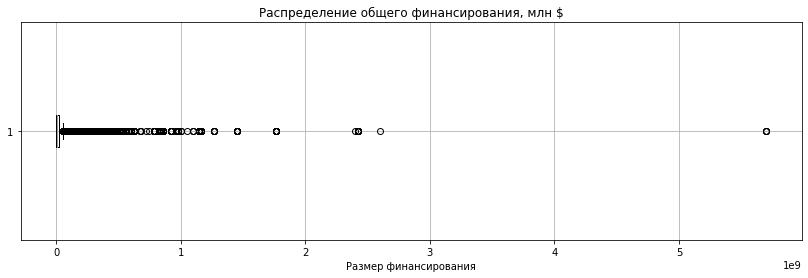

In [76]:
plt.figure(figsize=(14, 4))
plt.boxplot(new_с_and_r_df_filtr['funding_total'], vert = False)
plt.title('Распределение общего финансирования, млн $')
plt.xlabel('Размер финансирования')
plt.grid()

plt.show()


### 3.3. Куплены забесплатно?

- Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют.

In [77]:
new_с_and_r_df_cheep = new_с_and_r_df[
    (new_с_and_r_df['funding_total'] != 0)&
    (new_с_and_r_df['raised_amount']<=1)
]
display(new_с_and_r_df_cheep)

,company_ID,name,domain,network_username,category_code,status,founded_at,closed_at,company_id,investment_rounds,...,funding_round_id,funded_at,funding_round_type,raised_amount,funding_total,milestones,pre_money_valuation,participants,is_first_round,is_last_round
61,101094.0,Rev Worldwide,revworldwide.com,revworldwide,ecommerce,operating,2008-01-01,NaT,101094.0,0.0,...,46122.0,2013-02-01,series-c+,0.0,4815940.0,0.0,0.0,1.0,0.0,1.0
72,10129.0,Sportsvite,sportsvite.com,sportsvite,web,operating,2007-01-01,NaT,10129.0,0.0,...,54815.0,2013-03-01,angel,0.0,4350000.0,0.0,0.0,1.0,1.0,0.0
75,101312.0,SideTour,sidetour.com,sidetour,web,acquired,2011-06-01,NaT,101312.0,0.0,...,38158.0,2011-07-01,angel,0.0,4000000.0,2.0,0.0,1.0,0.0,1.0
98,10161.0,Cartera Commerce,cartera.com,CarteraCommerce,advertising,operating,2005-01-01,NaT,10161.0,0.0,...,3283.0,2006-03-13,series-a,0.0,37570700.0,2.0,0.0,1.0,0.0,1.0
171,102774.0,SHOP.CA,shop.ca,SHOPdotCA,ecommerce,operating,2011-07-01,NaT,102774.0,0.0,...,50176.0,2013-09-26,angel,0.0,26752200.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43064,9784.0,Trilliant,trilliantinc.com,Trilliant,hardware,operating,1995-01-01,NaT,9784.0,0.0,...,20608.0,2010-12-21,venture,0.0,146000000.0,3.0,0.0,5.0,1.0,0.0
43088,9840.0,KoolSpan,koolspan.com,KoolSpan1,security,operating,2003-03-01,NaT,9840.0,0.0,...,3757.0,2003-01-01,angel,0.0,28200000.0,3.0,0.0,2.0,0.0,1.0
43098,9843.0,CE Interactive,ce-interactive.com,NaN,software,operating,2004-01-01,NaT,9843.0,0.0,...,3755.0,2005-01-01,angel,0.0,2000000.0,0.0,0.0,1.0,0.0,1.0
43118,99.0,Amie Street,amiestreet.com,amiestreet_logs,web,acquired,2011-07-04,NaT,99.0,0.0,...,307.0,2007-08-01,series-a,0.0,3900000.0,0.0,0.0,1.0,0.0,1.0


In [78]:
new_с_and_r_df_cheep['funding_total'].describe()

count    1.589000e+03
mean     2.043606e+07
std      7.166628e+07
min      3.064000e+03
25%      1.000000e+06
50%      4.500000e+06
75%      1.500000e+07
max      1.451000e+09
Name: funding_total, dtype: float64

In [79]:
Q1 = 6.600000e+05
Q3 = 2.307720e+07
IQR = Q3 - Q1
print(IQR)

22417200.0


In [80]:
#Расчитываем пороги выбросов:
P1 = Q3 +(1.5*IQR)
P2 = Q1 -(1.5*IQR)
print(f' Верхний порог выбросов: {P1}')
print(f' Нижний порог выбросов: {P2}')

 Верхний порог выбросов: 56703000.0
 Нижний порог выбросов: -32965800.0


In [81]:
import numpy as np
data = new_с_and_r_df_filtr['funding_total']
percentile_P1 = np.sum(data <= P1) / len(data) * 100 
percentile_P2 = np.sum(data >= P2) / len(data) * 100
print(f'Процентиль для верхнего порога Р1: {percentile_P1:.2f}%')
print(f'Процентиль для нижнего порога Р2: {percentile_P2:.2f}%')

Процентиль для верхнего порога Р1: 88.91%
Процентиль для нижнего порога Р2: 100.00%


За нижним порогом нет аномальных значений! Выбросы есть за верхним порогом.

In [82]:
above_P1 = data[data>P1]
print("Выбросы выше верхнего порога:", above_P1)

Выбросы выше верхнего порога: 6        6.806920e+07
7        6.806920e+07
8        6.806920e+07
9        6.806920e+07
10       6.806920e+07
             ...     
43175    1.160170e+09
43176    1.160170e+09
43194    5.750000e+07
43195    5.750000e+07
43196    5.750000e+07
Name: funding_total, Length: 4792, dtype: float64


In [83]:
#Отфильтруем данные от выбросов, которые мы обнаружили:
data_no_eject = new_с_and_r_df_filtr[new_с_and_r_df_filtr['funding_total'] < P1]
data_no_eject.reset_index(drop=True, inplace=True)
display(data_no_eject)

,company_ID,name,domain,network_username,category_code,status,founded_at,closed_at,company_id,investment_rounds,...,funding_round_id,funded_at,funding_round_type,raised_amount,funding_total,milestones,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,wetpaint-inc.com,BachelrWetpaint,web,operating,2005-10-17,NaT,1.0,0.0,...,888.0,2005-10-01,series-a,5250000.0,39750000.0,5.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,wetpaint-inc.com,BachelrWetpaint,web,operating,2005-10-17,NaT,1.0,0.0,...,889.0,2007-01-01,series-b,9500000.0,39750000.0,5.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,wetpaint-inc.com,BachelrWetpaint,web,operating,2005-10-17,NaT,1.0,0.0,...,2312.0,2008-05-19,series-c+,25000000.0,39750000.0,5.0,0.0,4.0,1.0,0.0
3,1001.0,FriendFeed,friendfeed.com,friendfeed,web,acquired,2007-10-01,NaT,1001.0,0.0,...,1644.0,2008-02-26,series-a,5000000.0,5000000.0,3.0,0.0,3.0,1.0,1.0
4,10014.0,Mobclix,mobclix.com,mobclix,mobile,acquired,2008-03-01,NaT,10014.0,0.0,...,6682.0,2008-09-01,angel,0.0,0.0,4.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38399,3429.0,Zend Technologies,zend.com,networkzend,software,operating,1999-01-01,NaT,3429.0,0.0,...,2318.0,2006-08-28,series-c+,20000000.0,44000000.0,6.0,0.0,7.0,0.0,0.0
38400,3429.0,Zend Technologies,zend.com,networkzend,software,operating,1999-01-01,NaT,3429.0,0.0,...,2319.0,2004-07-19,series-c+,8000000.0,44000000.0,6.0,0.0,4.0,0.0,1.0
38401,3429.0,Zend Technologies,zend.com,networkzend,software,operating,1999-01-01,NaT,3429.0,0.0,...,15655.0,2010-05-17,venture,9000000.0,44000000.0,6.0,0.0,6.0,0.0,0.0
38402,3429.0,Zend Technologies,zend.com,networkzend,software,operating,1999-01-01,NaT,3429.0,0.0,...,20896.0,2011-01-10,venture,7000000.0,44000000.0,6.0,0.0,1.0,1.0,0.0



### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [84]:
#Допустим топ 15 компаний по ценам:
top = data_no_eject.groupby('name')['funding_total'].mean().sort_values(ascending=False).head(15)
display(top)

name
EnterpriseDB                 56600000.0
CeQur                        56600000.0
3VR                          56567200.0
AudienceScience              56546900.0
OnLive                       56500000.0
ADOR                         56464900.0
InsideView                   56462000.0
NetRetail Holding            56428000.0
CareCloud                    56400000.0
ePals                        56309200.0
Pandora Media                56300000.0
Vermillion                   56292400.0
Endgame                      56250000.0
Software Cellular Network    56170000.0
Oesia                        56130000.0
Name: funding_total, dtype: float64

In [87]:
data_no_eject['category_code'].unique()

array(['web', 'mobile', 'cleantech', 'analytics', 'network_hosting',
       'education', 'medical', 'manufacturing', 'games_video',
       'enterprise', 'ecommerce', 'software', 'advertising', 'news',
       'government', 'other', 'security', 'biotech', 'finance',
       'photo_video', 'travel', 'public_relations', 'social',
       'transportation', 'hardware', 'hospitality', 'health', 'sports',
       'nonprofit', 'search', 'fashion', 'messaging', 'music', nan,
       'consulting', 'design', 'legal', 'real_estate', 'semiconductor',
       'automotive', 'nanotech', 'pets', 'local'], dtype=object)

In [122]:
df = data_no_eject.copy()
data_categ_code = df.groupby('category_code')['funding_total'].mean().reset_index(name = 'mean').sort_values(by='mean', ascending=False)
display(data_categ_code)

,category_code,mean
35,semiconductor,2.113384e+07
20,medical,1.658678e+07
24,nanotech,1.609055e+07
4,cleantech,1.567319e+07
34,security,1.539312e+07
3,biotech,1.432381e+07
25,network_hosting,1.423362e+07
9,enterprise,1.334042e+07
19,manufacturing,1.219379e+07
0,advertising,1.103784e+07


In [102]:
agg_stats = df.groupby('category_code')['funding_total'].agg(['mean', 'std', 'count']).reset_index()
display(agg_stats)


,category_code,mean,std,count
0,advertising,1.103784e+07,1.335866e+07,1905
1,analytics,1.036673e+07,1.301154e+07,1156
2,automotive,7.937173e+06,1.238218e+07,112
3,biotech,1.432381e+07,1.548147e+07,3245
4,cleantech,1.567319e+07,1.580317e+07,975
5,consulting,7.595652e+06,1.239030e+07,305
6,design,3.104245e+06,4.914869e+06,65
7,ecommerce,6.903730e+06,1.196294e+07,2012
8,education,6.036788e+06,1.004069e+07,653
9,enterprise,1.334042e+07,1.442160e+07,2652


In [123]:
top_mean = agg_stats.sort_values(by='mean', ascending=False)
top_std = agg_stats.sort_values(by='std', ascending=False)
display(top_mean.head(10))
display(top_std.head(10))

,category_code,mean,std,count
35,semiconductor,2.113384e+07,1.545674e+07,585
20,medical,1.658678e+07,1.582019e+07,755
24,nanotech,1.609055e+07,1.587364e+07,75
4,cleantech,1.567319e+07,1.580317e+07,975
34,security,1.539312e+07,1.663059e+07,592
3,biotech,1.432381e+07,1.548147e+07,3245
25,network_hosting,1.423362e+07,1.547132e+07,587
9,enterprise,1.334042e+07,1.442160e+07,2652
19,manufacturing,1.219379e+07,1.434439e+07,322
0,advertising,1.103784e+07,1.335866e+07,1905


,category_code,mean,std,count
34,security,1.539312e+07,1.663059e+07,592
24,nanotech,1.609055e+07,1.587364e+07,75
20,medical,1.658678e+07,1.582019e+07,755
4,cleantech,1.567319e+07,1.580317e+07,975
3,biotech,1.432381e+07,1.548147e+07,3245
25,network_hosting,1.423362e+07,1.547132e+07,587
35,semiconductor,2.113384e+07,1.545674e+07,585
26,news,1.012961e+07,1.473329e+07,272
9,enterprise,1.334042e+07,1.442160e+07,2652
19,manufacturing,1.219379e+07,1.434439e+07,322


В обоих топах лидирующие позиции заняли категории: medical, nanotech.


### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [151]:
#Количество раундов для каждого возможного статуса стартапа:
new_с_and_r_df.groupby('status')['funding_rounds'].mean()

status
acquired     2.843898
closed       1.943192
ipo          4.838674
operating    2.676006
Name: funding_rounds, dtype: float64

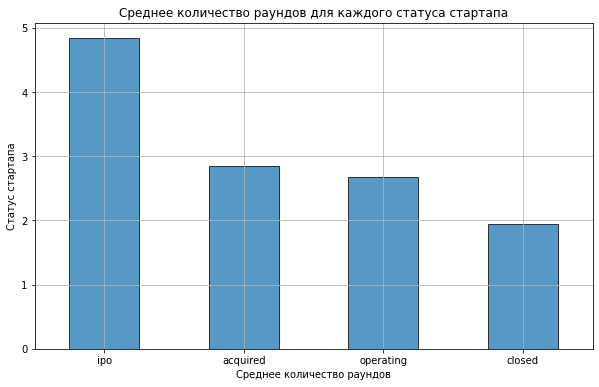

In [154]:
plt.figure(figsize=(10, 6))
new_с_and_r_df.groupby('status')['funding_rounds'].mean().sort_values(ascending=False).plot(
                kind='bar', 
                alpha=0.75,
                edgecolor='black',
                rot=0 
)
plt.title('Среднее количество раундов для каждого статуса стартапа')
plt.xlabel('Среднее количество раундов')
plt.ylabel('Статус стартапа')

plt.grid()
plt.show()



Судя по результатам дольше всего протянут стартапы со статусом ipo.


## Шаг 4. Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

В первую очередь были проанализированы все датафреймы на корректность значений в столбцах, на наличие пропусков и дубликатов, была произведена коррекция по типам данных в ряде столбцов в разных датафреймах - в основном скорректирован тип данных по дате и времени.
На этапе предварительного исследования выснилось следующее:
- В 1989 году типичный размер собранных в рамках одного раунда средств был максимален.
- Количество раундов возрастает примерно но 2007 года, затем убывает
- В 2013 году - снижение тендненции по количеству раундов и выделяемых в рамках каждого раунда средств
- Чем больше компания по количеству людей в ней - тем больше в ней людей с законченным образованием. В малых компаниях могут работать студенты. Датафрейм degrees мало чем нам поможет в понимании доли людей без образования, но может послужить для детализации в рамках отдельных отраслей.
- Столбец network_username не подходит для объединения данных т.к.доли пересекающихся значений очень малы.
- Была выяснена причина большого количества пропусков в датафрейме company_and_rounds, причина - некорректно объединение двух таблиц.
В результате исследовательского анализа был получен корректный датафрейм, показывающий информацию о компаниях которые меняли или готовы менять владельцов.
  - Анализ выбросов показал их наличие только с одной стороны - выше верхнего порогового значения. Их мы отфильтровали, чтобы они не искажали данные.
  - Составлен топ 15 компаний по уровню финансирования
  - Компании разделены на 4 категориии по значениям цен(низкая, средняя, высокая, очень высокая)
  - Определено среднее количество раундов для каждого статуса стартапа.
  - Для крупных инвесторов наиболее будут привлекательны стартапы с категоряими medical и nanotech.
  - Дольше всего протянут стартапы со статусом ipo.(даанный статус стартапа имеет наибольшее количество раундов)